In [52]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from fredapi import Fred
from utils.key import APIKEY as API_FRED


fred = Fred(api_key=API_FRED)
USREC = fred.get_series("USREC")

In [53]:
info = pd.read_csv("/home/eduardo/Documents/Faculdade/Projeto PTC3567/data/variables_info.csv")
info

,tcode,fred,description,group
0,5,RPI,Real Personal Income,Output and Income
1,5,W875RX1,Real personal income ex transfer receipts,Output and Income
2,5,INDPRO,IP Index,Output and Income
3,5,IPFPNSS,IP : Final Products and Nonindustrial Supplies,Output and Income
4,5,IPFINAL,IP : Final Products ( Market Group ),Output and Income
...,...,...,...,...
129,6,DSERRG3M086SBEA,Personal Cons . Exp : Services,Prices
130,5,S & P 500,S & P's Common Stock Price Index : Composite,Stock Market
131,5,S & P : indust,S & P's Common Stock Price Index : Industrials,Stock Market
132,2,S & P div yield,S & P's Composite Common Stock : Dividend Yield,Stock Market


In [54]:
# transformations = pd.read_csv("data/current_2023-10_monthly.csv").iloc[0,:].reset_index()
# transformations = transformations.iloc[1:]
# transformations.columns = ['Variable','TransformationCode']
# transformations['TransformationCode'] = transformations['TransformationCode'].astype("int")
# transformations

In [56]:
fred_md_monthly   = pd.read_csv("data/current_2023-10_monthly.csv").iloc[1:,:].reset_index(drop=True)
fred_md_monthly

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,5/1/1959,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5528,24.3936,23.1231,32.5925,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,5/1/2023,19074.384,15636.1,115.400,1.489005e+06,689158.00000,102.7864,101.3461,101.8586,102.8448,...,118.279,122.441,29.33,33.97,26.15,59.2,483082.33,889095.91,5210.2067,17.3964
773,6/1/2023,19082.740,15654.8,115.693,1.488903e+06,690518.00000,102.3673,100.6659,100.9632,101.5389,...,118.369,122.797,29.52,34.04,26.40,64.4,492904.98,902738.96,5188.5697,14.0327
774,7/1/2023,19087.488,15684.9,116.432,1.501507e+06,693668.00000,103.0920,101.4893,102.0583,102.7410,...,118.353,123.352,29.63,34.23,26.49,71.6,496045.47,906464.06,5166.1852,13.8333
775,8/1/2023,19084.931,15701.3,116.495,NaN,697557.00000,103.4886,101.6517,102.2223,102.5417,...,119.998,123.605,29.74,34.40,26.59,69.5,NaN,NaN,5114.3320,15.7822


In [74]:
fred_md_monthly= fred_md_monthly.rename(columns={"sasdate":'date'})

In [57]:
fred_md_monthly.shape

(777, 128)

In [58]:
for i in fred_md_monthly.columns:
    print(i)

sasdate
RPI
W875RX1
DPCERA3M086SBEA
CMRMTSPLx
RETAILx
INDPRO
IPFPNSS
IPFINAL
IPCONGD
IPDCONGD
IPNCONGD
IPBUSEQ
IPMAT
IPDMAT
IPNMAT
IPMANSICS
IPB51222S
IPFUELS
CUMFNS
HWI
HWIURATIO
CLF16OV
CE16OV
UNRATE
UEMPMEAN
UEMPLT5
UEMP5TO14
UEMP15OV
UEMP15T26
UEMP27OV
CLAIMSx
PAYEMS
USGOOD
CES1021000001
USCONS
MANEMP
DMANEMP
NDMANEMP
SRVPRD
USTPU
USWTRADE
USTRADE
USFIRE
USGOVT
CES0600000007
AWOTMAN
AWHMAN
HOUST
HOUSTNE
HOUSTMW
HOUSTS
HOUSTW
PERMIT
PERMITNE
PERMITMW
PERMITS
PERMITW
ACOGNO
AMDMNOx
ANDENOx
AMDMUOx
BUSINVx
ISRATIOx
M1SL
M2SL
M2REAL
BOGMBASE
TOTRESNS
NONBORRES
BUSLOANS
REALLN
NONREVSL
CONSPI
S&P 500
S&P: indust
S&P div yield
S&P PE ratio
FEDFUNDS
CP3Mx
TB3MS
TB6MS
GS1
GS5
GS10
AAA
BAA
COMPAPFFx
TB3SMFFM
TB6SMFFM
T1YFFM
T5YFFM
T10YFFM
AAAFFM
BAAFFM
TWEXAFEGSMTHx
EXSZUSx
EXJPUSx
EXUSUKx
EXCAUSx
WPSFD49207
WPSFD49502
WPSID61
WPSID62
OILPRICEx
PPICMM
CPIAUCSL
CPIAPPSL
CPITRNSL
CPIMEDSL
CUSR0000SAC
CUSR0000SAD
CUSR0000SAS
CPIULFSL
CUSR0000SA0L2
CUSR0000SA0L5
PCEPI
DDURRG3M086SBEA
DNDGRG3M08

In [59]:
fred_md_monthly.dtypes

sasdate             object
RPI                float64
W875RX1            float64
DPCERA3M086SBEA    float64
CMRMTSPLx          float64
                    ...   
UMCSENTx           float64
DTCOLNVHFNM        float64
DTCTHFNM           float64
INVEST             float64
VIXCLSx            float64
Length: 128, dtype: object

In [60]:
fred_md_monthly

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,5/1/1959,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5528,24.3936,23.1231,32.5925,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,5/1/2023,19074.384,15636.1,115.400,1.489005e+06,689158.00000,102.7864,101.3461,101.8586,102.8448,...,118.279,122.441,29.33,33.97,26.15,59.2,483082.33,889095.91,5210.2067,17.3964
773,6/1/2023,19082.740,15654.8,115.693,1.488903e+06,690518.00000,102.3673,100.6659,100.9632,101.5389,...,118.369,122.797,29.52,34.04,26.40,64.4,492904.98,902738.96,5188.5697,14.0327
774,7/1/2023,19087.488,15684.9,116.432,1.501507e+06,693668.00000,103.0920,101.4893,102.0583,102.7410,...,118.353,123.352,29.63,34.23,26.49,71.6,496045.47,906464.06,5166.1852,13.8333
775,8/1/2023,19084.931,15701.3,116.495,NaN,697557.00000,103.4886,101.6517,102.2223,102.5417,...,119.998,123.605,29.74,34.40,26.59,69.5,NaN,NaN,5114.3320,15.7822


In [61]:
fred_md_monthly["date"] = pd.to_datetime(fred_md_monthly["date"],format="%m/%d/%Y")
fred_md_monthly

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5528,24.3936,23.1231,32.5925,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2023-05-01,19074.384,15636.1,115.400,1.489005e+06,689158.00000,102.7864,101.3461,101.8586,102.8448,...,118.279,122.441,29.33,33.97,26.15,59.2,483082.33,889095.91,5210.2067,17.3964
773,2023-06-01,19082.740,15654.8,115.693,1.488903e+06,690518.00000,102.3673,100.6659,100.9632,101.5389,...,118.369,122.797,29.52,34.04,26.40,64.4,492904.98,902738.96,5188.5697,14.0327
774,2023-07-01,19087.488,15684.9,116.432,1.501507e+06,693668.00000,103.0920,101.4893,102.0583,102.7410,...,118.353,123.352,29.63,34.23,26.49,71.6,496045.47,906464.06,5166.1852,13.8333
775,2023-08-01,19084.931,15701.3,116.495,NaN,697557.00000,103.4886,101.6517,102.2223,102.5417,...,119.998,123.605,29.74,34.40,26.59,69.5,NaN,NaN,5114.3320,15.7822


In [62]:
fred_md_monthly = fred_md_monthly.iloc[:-2] # last rows had many NaNs

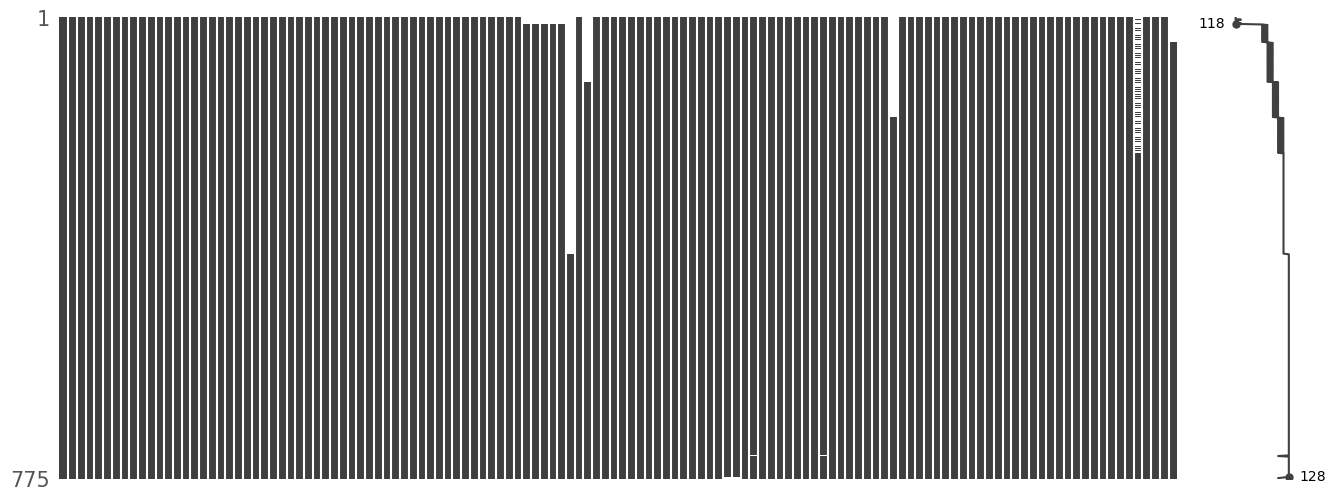

In [63]:
missingno.matrix(fred_md_monthly,figsize=(16,6), fontsize=12);

In [64]:
prop_nas = (fred_md_monthly.query("date	 < '2023-01-01'").isna().sum()/fred_md_monthly.shape[0]).reset_index().rename(columns={"index":"col",0:"PropNA"})
prop_nas.query("PropNA >0")

,col,PropNA
53,PERMIT,0.015484
54,PERMITNE,0.015484
55,PERMITMW,0.015484
56,PERMITS,0.015484
57,PERMITW,0.015484
58,ACOGNO,0.512258
60,ANDENOx,0.140645
79,CP3Mx,0.001290
87,COMPAPFFx,0.001290
95,TWEXAFEGSMTHx,0.216774


In [65]:
prop_nas = (fred_md_monthly.isna().sum()/fred_md_monthly.shape[0]).reset_index().rename(columns={"index":"col",0:"PropNA"})
prop_nas.query("PropNA >0")

,col,PropNA
53,PERMIT,0.015484
54,PERMITNE,0.015484
55,PERMITMW,0.015484
56,PERMITS,0.015484
57,PERMITW,0.015484
58,ACOGNO,0.512258
60,ANDENOx,0.140645
76,S&P div yield,0.005161
77,S&P PE ratio,0.003871
79,CP3Mx,0.001290


In [70]:
first_NA = {}
for c in fred_md_monthly.columns:
    if fred_md_monthly[fred_md_monthly[c].isna()].shape[0] > 0:
        date_min = fred_md_monthly[fred_md_monthly[c].isna()]['date'].min().strftime("%Y-%m-%d")
        first_NA.update({c:date_min})


In [76]:
first_NA.keys()

dict_keys(['PERMIT', 'PERMITNE', 'PERMITMW', 'PERMITS', 'PERMITW', 'ACOGNO', 'ANDENOx', 'S&P div yield', 'S&P PE ratio', 'CP3Mx', 'COMPAPFFx', 'TWEXAFEGSMTHx', 'UMCSENTx', 'VIXCLSx'])

In [77]:
first_not_NA = {}
for c in first_NA.keys():

    date_min = fred_md_monthly[fred_md_monthly[c].isna() == False]['date'].min().strftime("%Y-%m-%d")
    
    first_not_NA.update({c:date_min})


In [79]:
first_NA 

{'PERMIT': '1959-01-01',
 'PERMITNE': '1959-01-01',
 'PERMITMW': '1959-01-01',
 'PERMITS': '1959-01-01',
 'PERMITW': '1959-01-01',
 'ACOGNO': '1959-01-01',
 'ANDENOx': '1959-01-01',
 'S&P div yield': '2023-04-01',
 'S&P PE ratio': '2023-05-01',
 'CP3Mx': '2020-04-01',
 'COMPAPFFx': '2020-04-01',
 'TWEXAFEGSMTHx': '1959-01-01',
 'UMCSENTx': '1959-01-01',
 'VIXCLSx': '1959-01-01'}

In [78]:
first_not_NA 

{'PERMIT': '1960-01-01',
 'PERMITNE': '1960-01-01',
 'PERMITMW': '1960-01-01',
 'PERMITS': '1960-01-01',
 'PERMITW': '1960-01-01',
 'ACOGNO': '1992-02-01',
 'ANDENOx': '1968-02-01',
 'S&P div yield': '1959-01-01',
 'S&P PE ratio': '1959-01-01',
 'CP3Mx': '1959-01-01',
 'COMPAPFFx': '1959-01-01',
 'TWEXAFEGSMTHx': '1973-01-01',
 'UMCSENTx': '1959-05-01',
 'VIXCLSx': '1962-07-01'}

Maybe the ideal sample starts on  '1962-07-01' and goes to '2023-04-01'

In [86]:
USREC

1854-12-01    1.0
1855-01-01    0.0
1855-02-01    0.0
1855-03-01    0.0
1855-04-01    0.0
             ... 
2023-05-01    0.0
2023-06-01    0.0
2023-07-01    0.0
2023-08-01    0.0
2023-09-01    0.0
Length: 2026, dtype: float64

In [88]:
USREC=USREC.reset_index().rename(columns={'index':"date",0:"USREC"})
USREC['date'] = pd.to_datetime(USREC['date'])
USREC

,date,USREC
0,1854-12-01,1.0
1,1855-01-01,0.0
2,1855-02-01,0.0
3,1855-03-01,0.0
4,1855-04-01,0.0
...,...,...
2021,2023-05-01,0.0
2022,2023-06-01,0.0
2023,2023-07-01,0.0
2024,2023-08-01,0.0


In [102]:
main_dataframe = fred_md_monthly.merge(USREC,on='date',how='left')

In [105]:
prop_nas.query("PropNA > 0")['col'].tolist()

['PERMIT',
 'PERMITNE',
 'PERMITMW',
 'PERMITS',
 'PERMITW',
 'ACOGNO',
 'ANDENOx',
 'S&P div yield',
 'S&P PE ratio',
 'CP3Mx',
 'COMPAPFFx',
 'TWEXAFEGSMTHx',
 'UMCSENTx',
 'VIXCLSx']

In [111]:
#removing all columns that contains NANs
working_dataset_v1 = main_dataframe.copy()
working_dataset_v1.drop(prop_nas.query("PropNA > 0")['col'].tolist(),axis=1,inplace=True)
working_dataset_v1.head()


,date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,USREC
0,1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9665,23.3891,22.2688,31.7011,...,63.517,18.294,10.152,2.13,2.45,2.04,6476.0,12298.0,84.2043,0.0
1,1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3966,23.7048,22.4617,31.9337,...,63.554,18.302,10.167,2.14,2.46,2.05,6476.0,12298.0,83.5280,0.0
2,1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7193,23.8483,22.5719,31.9337,...,63.634,18.289,10.185,2.15,2.45,2.07,6508.0,12349.0,81.6405,0.0
3,1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.2032,24.1927,22.9026,32.4374,...,63.698,18.300,10.221,2.16,2.47,2.08,6620.0,12484.0,81.8099,0.0
4,1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5528,24.3936,23.1231,32.5925,...,63.804,18.280,10.238,2.17,2.48,2.08,6753.0,12646.0,80.7315,0.0


In [110]:
working_dataset_v1.isna().any().sum()

0

# Decision Tree Classifier 

In [112]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score, recall_score, f1_score, classification_report ,roc_curve, roc_auc_score ,roc_curve, auc, ConfusionMatrixDisplay , RocCurveDisplay

from sklearn.tree import DecisionTreeClassifier


In [130]:
import utils_FRED_MD.model_evaluation  as me
SPLIT = 0.7
SEED=42

X = working_dataset_v1.drop(["USREC",'date'], axis = 1)
y = working_dataset_v1["USREC"]

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = SPLIT,stratify=y ,random_state = SEED)




mod_tree1 = DecisionTreeClassifier()

mod_tree1.fit(X_train, y_train)


train_metrics = me.get_metrics(mod_tree1,y_train,X_train)
test_metrics = me.get_metrics(mod_tree1,y_test,X_test)
me.display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  1.0
Accuracy  - Test :  0.9571
----------------------------------------------------------------------------------------------------
Precision  - Train :  1.0
Precision  - Test :  0.8519
----------------------------------------------------------------------------------------------------
Recall  - Train :  1.0
Recall  - Test :  0.7931
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  1.0
F1-Score  - Test :  0.8214
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  1.0
Area Under the Curve  - Test :  0.8867
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.77
----------------------------------------------------------------------------------------------------


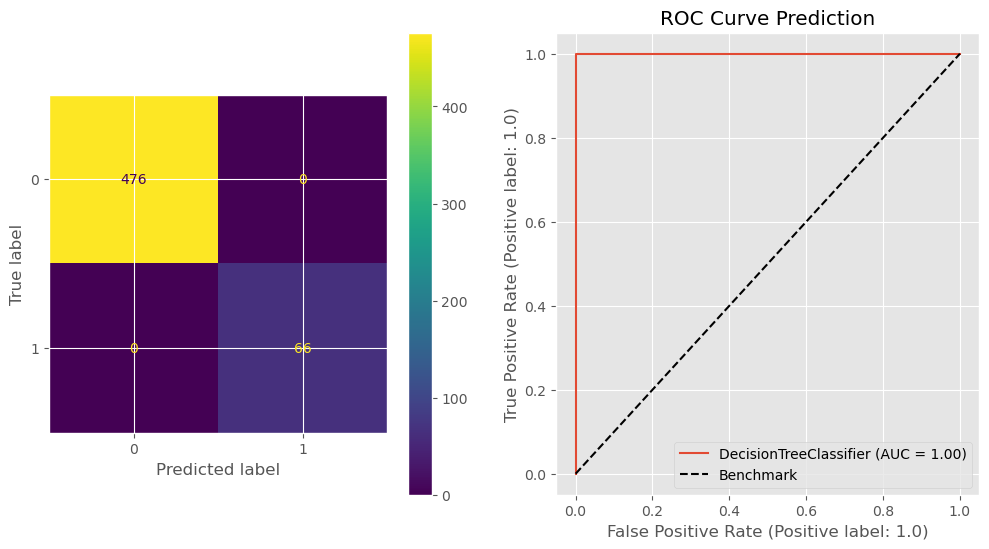

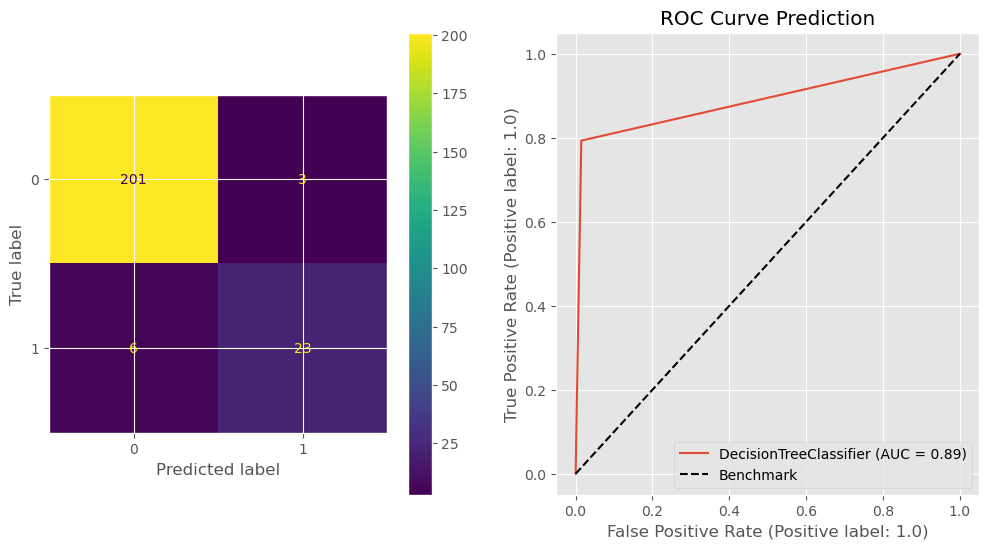

In [125]:
me.plot_classification_metrics(mod_tree1,y_train,X_train)
me.plot_classification_metrics(mod_tree1,y_test,X_test)


In [128]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

mod_tree2 = DecisionTreeClassifier()

mod_tree2.fit(X_train, y_train)


train_metrics2 = me.get_metrics(mod_tree2,y_train,X_train)
test_metrics2 = me.get_metrics(mod_tree2,y_test,X_test)

In [132]:
me.display_metrics(train_metrics2,test_metrics2)

Accuracy  - Train :  1.0
Accuracy  - Test :  0.9614
----------------------------------------------------------------------------------------------------
Precision  - Train :  1.0
Precision  - Test :  0.8571
----------------------------------------------------------------------------------------------------
Recall  - Train :  1.0
Recall  - Test :  0.8276
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  1.0
F1-Score  - Test :  0.8421
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  1.0
Area Under the Curve  - Test :  0.904
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.81
----------------------------------------------------------------------------------------------------


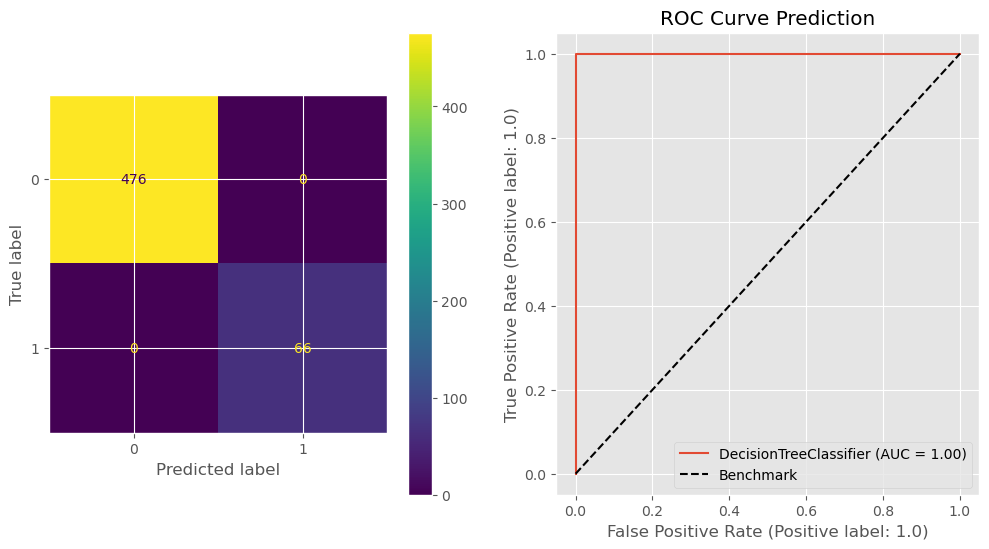

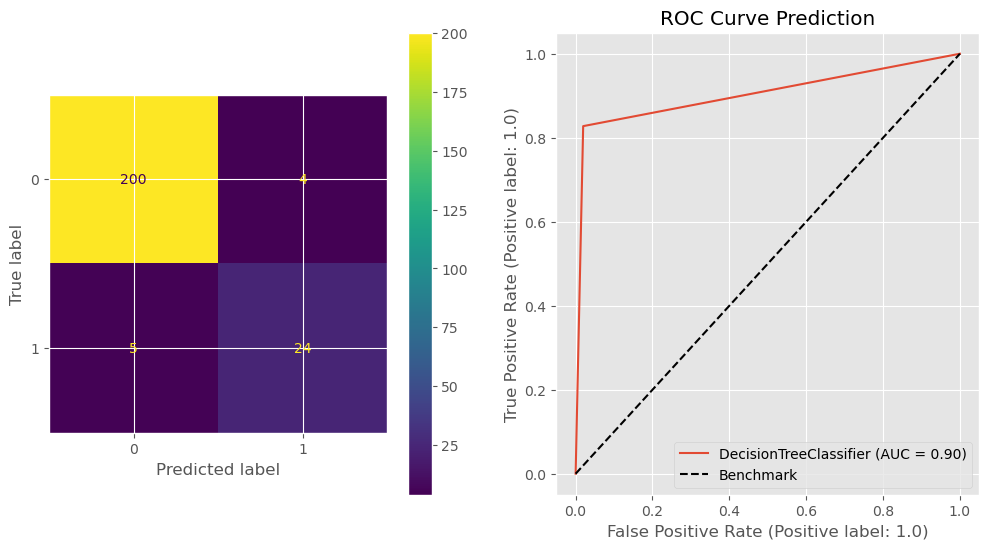

In [131]:
me.plot_classification_metrics(mod_tree2,y_train,X_train)
me.plot_classification_metrics(mod_tree2,y_test,X_test)


<AxesSubplot:>

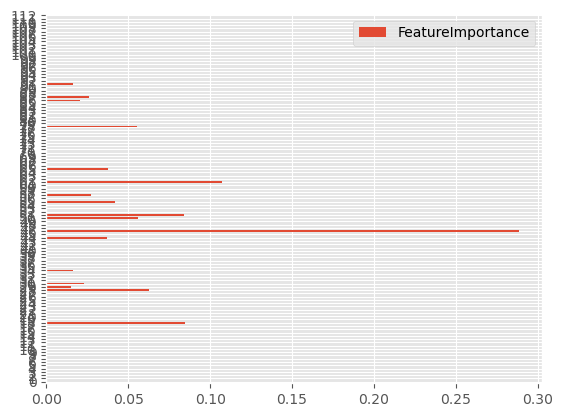

In [139]:
feature_importance_2 = pd.DataFrame({"col":X.columns,"FeatureImportance":mod_tree2.feature_importances_})
feature_importance_2.plot(kind='barh')

In [136]:
print("Feature importances:\n{}".format(mod_tree2.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.08468668 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06258344 0.01533543
 0.02300314 0.         0.         0.         0.01656226 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03719096 0.         0.2883784  0.
 0.         0.         0.05604709 0.08429766 0.         0.
 0.         0.04213488 0.         0.02734739 0.         0.
 0.         0.10706437 0.         0.         0.         0.0373801
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.05507039 0.         0.         0.         0.         0.
 0.         0.         0.02080176 0.02587853 0.         0.
 0.         0.01623751 0.         0.         0.         0.
 0.         0.      

In [133]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

mod_tree3 = DecisionTreeClassifier()

mod_tree3.fit(X_train, y_train)


train_metrics3 = me.get_metrics(mod_tree3,y_train,X_train)
test_metrics3 = me.get_metrics(mod_tree3,y_test,X_test)

In [135]:
me.display_metrics(train_metrics3,test_metrics3)

Accuracy  - Train :  1.0
Accuracy  - Test :  0.9571
----------------------------------------------------------------------------------------------------
Precision  - Train :  1.0
Precision  - Test :  0.8276
----------------------------------------------------------------------------------------------------
Recall  - Train :  1.0
Recall  - Test :  0.8276
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  1.0
F1-Score  - Test :  0.8276
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  1.0
Area Under the Curve  - Test :  0.9015
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.8
----------------------------------------------------------------------------------------------------


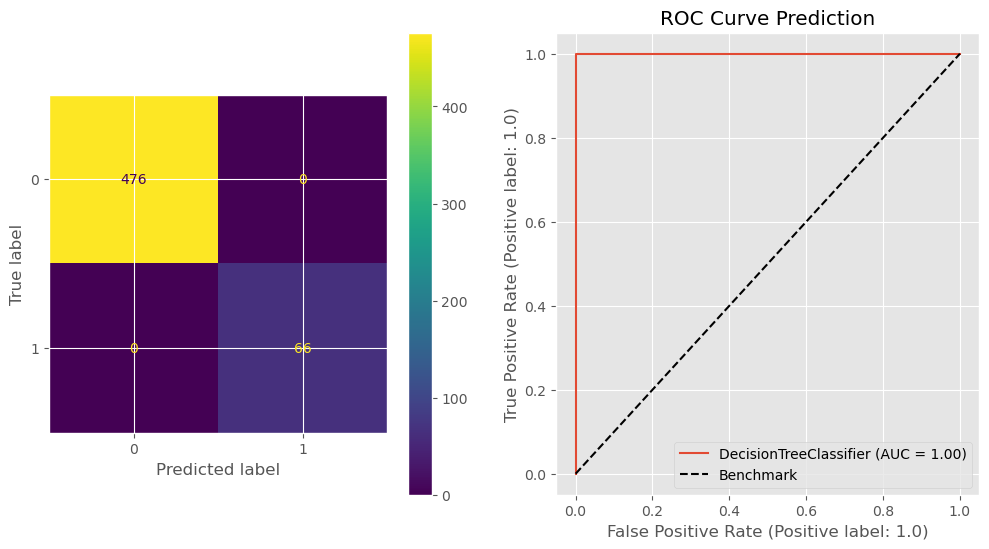

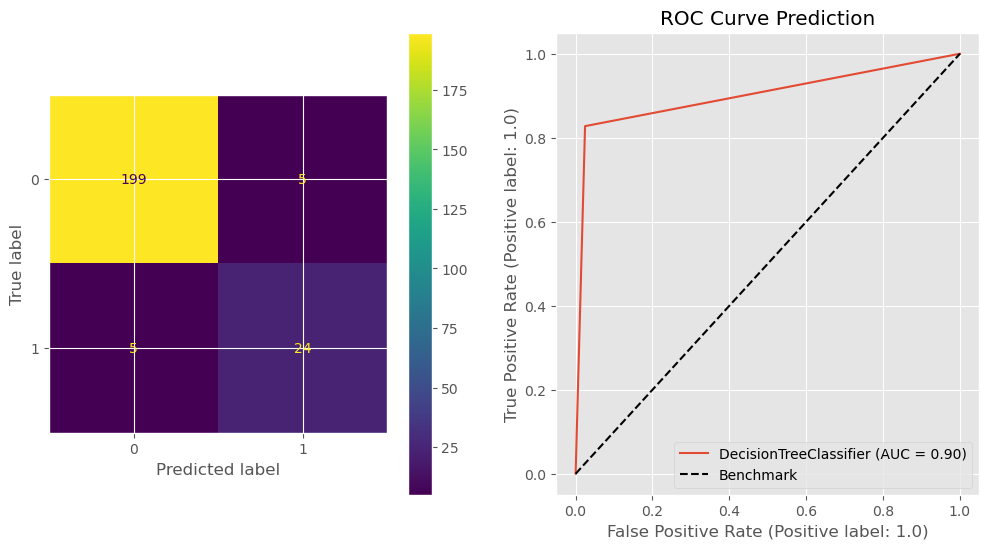

In [134]:
me.plot_classification_metrics(mod_tree3,y_train,X_train)
me.plot_classification_metrics(mod_tree3,y_test,X_test)


<AxesSubplot:>

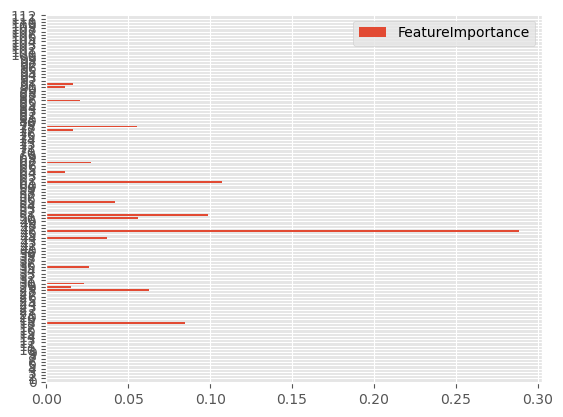

In [140]:
feature_importance_3 = pd.DataFrame({"col":X.columns,"FeatureImportance":mod_tree3.feature_importances_})
feature_importance_3.plot(kind='barh')

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train ,y_train)

train_metrics4 = me.get_metrics(forest,y_train,X_train)
test_metrics4 = me.get_metrics(forest,y_test,X_test)

me.display_metrics(train_metrics4,test_metrics4)

Accuracy  - Train :  0.9963
Accuracy  - Test :  0.9742
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.9706
Precision  - Test :  0.96
----------------------------------------------------------------------------------------------------
Recall  - Train :  1.0
Recall  - Test :  0.8276
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.9851
F1-Score  - Test :  0.8889
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.9996
Area Under the Curve  - Test :  0.994
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.99
----------------------------------------------------------------------------------------------------


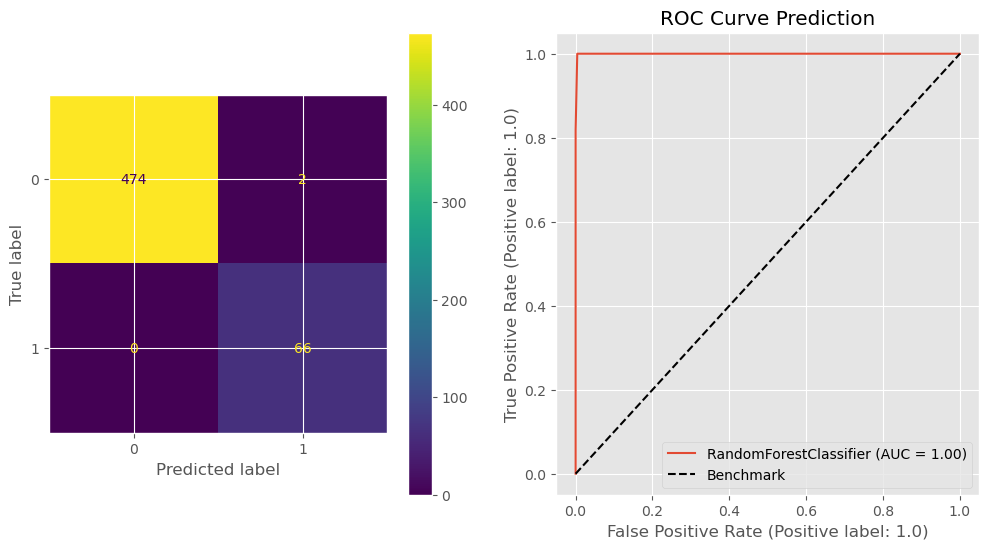

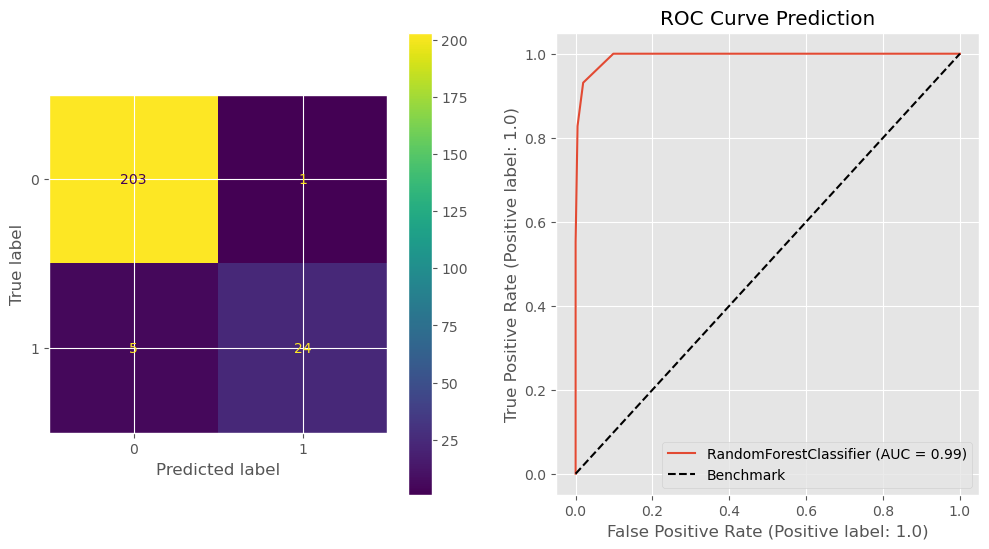

In [144]:
me.plot_classification_metrics(forest,y_train,X_train)
me.plot_classification_metrics(forest,y_test,X_test)


<AxesSubplot:>

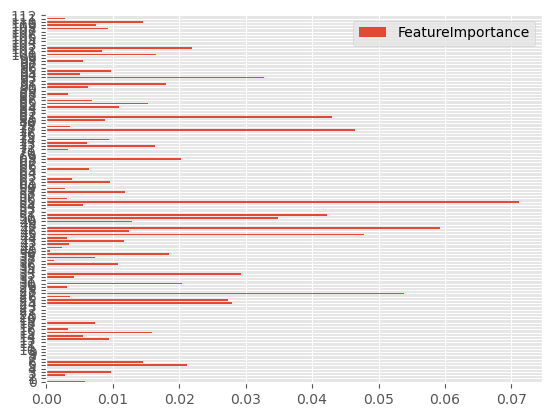

In [145]:
feature_importance_4 = pd.DataFrame({"col":X.columns,"FeatureImportance":forest.feature_importances_})
feature_importance_4.plot(kind='barh')

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

fores2 = RandomForestClassifier(n_estimators=5, random_state=2)
fores2.fit(X_train_norm ,y_train)

train_metrics5 = me.get_metrics(fores2,y_train,X_train_norm)
test_metrics5 = me.get_metrics(fores2,y_test,X_test_norm)

me.display_metrics(train_metrics5,test_metrics5)

Accuracy  - Train :  0.9963
Accuracy  - Test :  0.9742
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.9706
Precision  - Test :  0.96
----------------------------------------------------------------------------------------------------
Recall  - Train :  1.0
Recall  - Test :  0.8276
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.9851
F1-Score  - Test :  0.8889
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.9996
Area Under the Curve  - Test :  0.9945
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.99
----------------------------------------------------------------------------------------------------


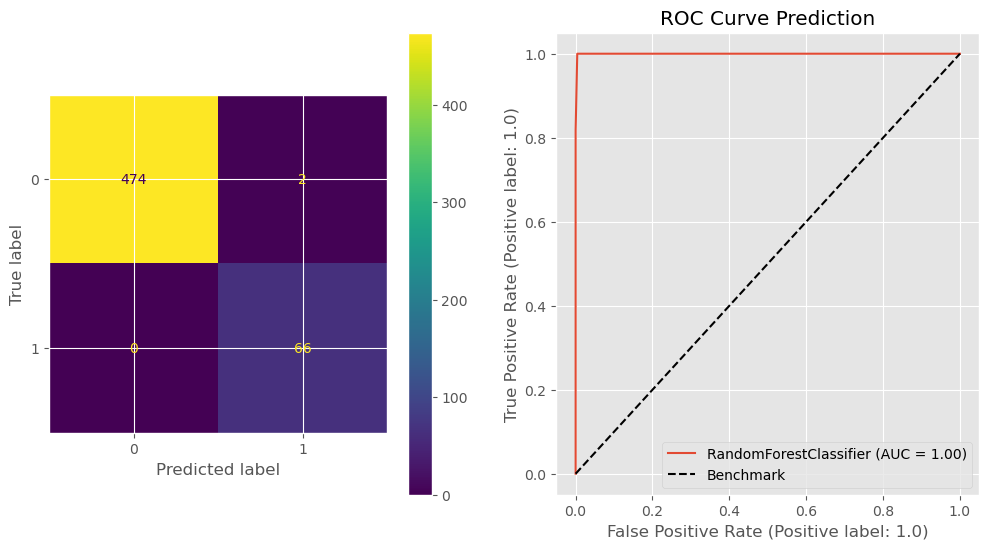

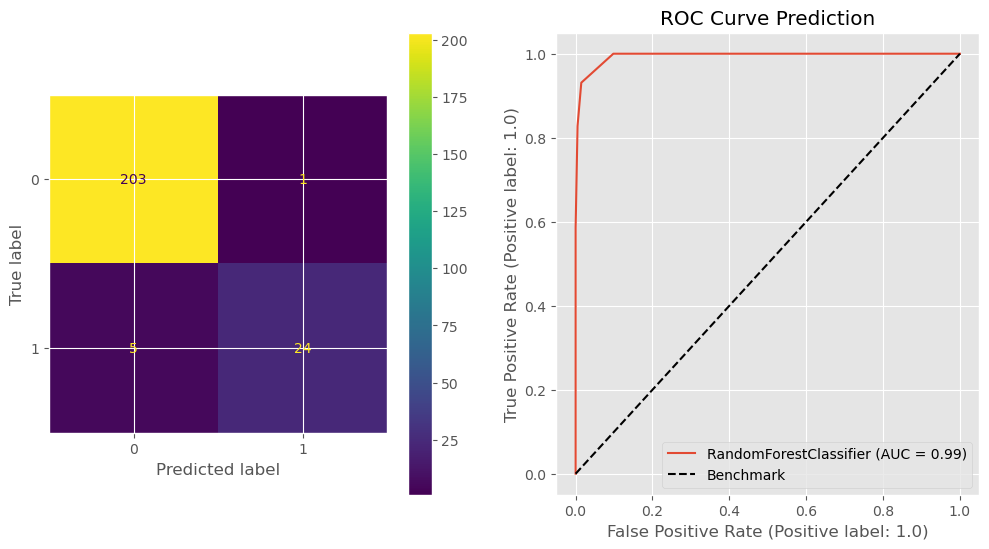

In [149]:
me.plot_classification_metrics(fores2,y_train,X_train_norm)
me.plot_classification_metrics(fores2,y_test,X_test_norm)


In [152]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=SEED)
gbrt.fit(X_train, y_train)


train_metrics6 = me.get_metrics(gbrt,y_train,X_train)
test_metrics6 = me.get_metrics(gbrt,y_test,X_test)

me.display_metrics(train_metrics6,test_metrics6)


Accuracy  - Train :  1.0
Accuracy  - Test :  0.9871
----------------------------------------------------------------------------------------------------
Precision  - Train :  1.0
Precision  - Test :  1.0
----------------------------------------------------------------------------------------------------
Recall  - Train :  1.0
Recall  - Test :  0.8966
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  1.0
F1-Score  - Test :  0.9455
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  1.0
Area Under the Curve  - Test :  0.9954
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.99
----------------------------------------------------------------------------------------------------


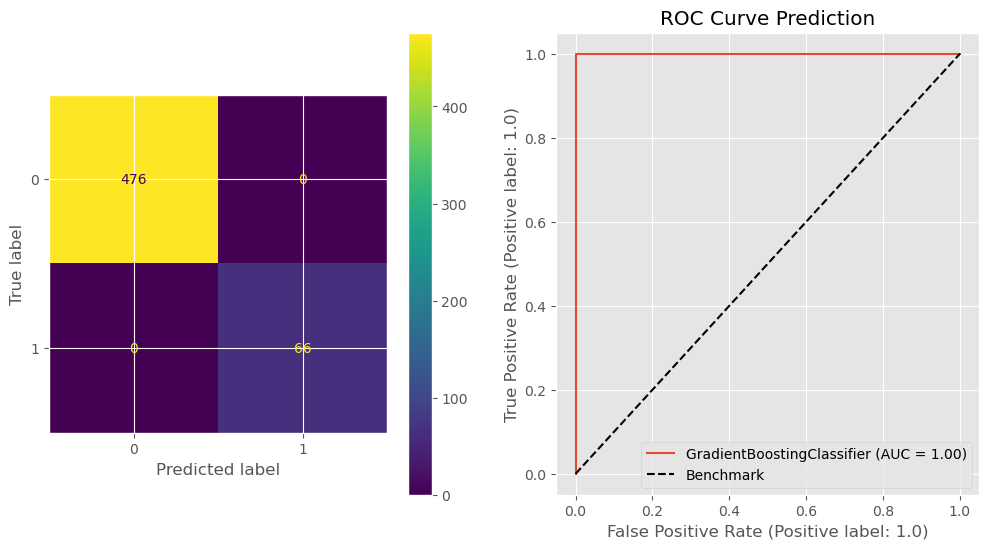

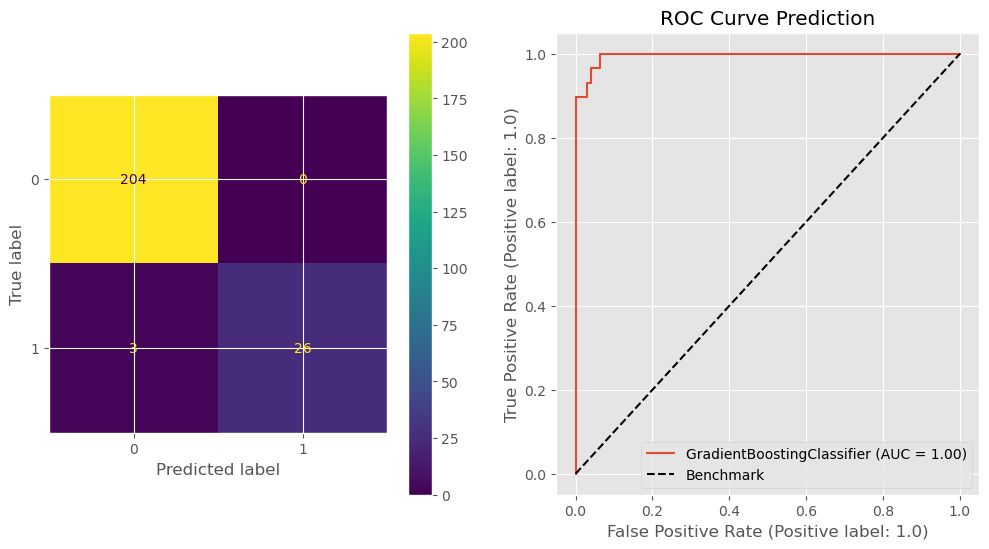

In [154]:
me.plot_classification_metrics(gbrt,y_train,X_train)
me.plot_classification_metrics(gbrt,y_test,X_test)
